In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle

from utils.latticeeasy import *

In [2]:
from matplotlib import rc
import matplotlib as mpl
from matplotlib.colors import ListedColormap
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 9})

plt.rcParams['axes.axisbelow'] = True


# Save dir

In [3]:
save_dir = "images_for_paper"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load Data

In [4]:
outs = [
    "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/trial_2/osc2_128/boost_0.02c_256",
    "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_25_695.675659/trial_2/osc1_128/boost_0.02c_256",
    "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.25_80_351.512634/trial_2/osc17_128/boost_0.02c_256",
    "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_100_301.15863/trial_2/osc33_128/boost_0.02c_256"
]

In [5]:
LEs = [LATTICEEASY(out) for out in outs]

In [6]:
get_c = lambda data : 1/data.a[0]**(get_s(data.alpha)+1)

cs = [get_c(LE) for LE in LEs]

In [7]:
WHOLE_FIELD = 1
if WHOLE_FIELD:
    f_ext = "_field"
else:
    f_ext = ""

In [8]:
def get_vels(data):
    
    com_velocities_t_dict = pickle.load(open(os.path.join(data.output_dir,f"com_velocities_t_dict{f_ext}.p"),'rb'))
    com_velocities = np.array([com_velocities_t_dict[t] for t in data.t[:-1]]).T

    return com_velocities
    
com_vels = [get_vels(LE) for LE in LEs]

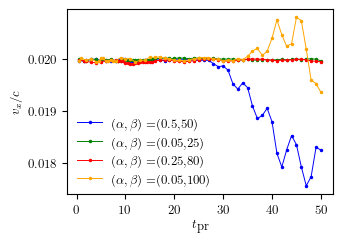

In [9]:
fig, ax = plt.subplots(1,1,figsize=(3.5,2.5),tight_layout=True,sharex=True)

colors = ['b', 'g', 'r', 'orange']

for i, (LE, com_vel, c) in enumerate(zip(LEs,com_vels,cs)):
    ax.plot(LE.t[:-1]+LE.dt_pr/2, com_vel[0]/c, c=colors[i], marker=".", markersize=3, label=r'$(\alpha,\beta)=$'+f'({LE.alpha},{round(LE.beta)})', lw=.7, alpha=1)

fig.legend(ncols=1,loc=(.21,.21,), framealpha=0)


ax.set_xlabel(r'$t_{\textrm{pr}}$')
ax.set_ylabel(r'$v_x/c$')

fig.savefig(os.path.join(save_dir,"boost velocities.png"),dpi=400,facecolor='white')
plt.show()